# 📓 Chapter 10 Notebook  
## X‑rays, CT, and Atomic Physics  
### *Attenuation, Imaging Contrast, and Why X‑rays Interact with Matter*

This notebook is designed for beginners: most activities are “change a number → run → interpret.”  
Optional **advanced** sections are pre-filled (interactive sliders, toy CT sinogram/reconstruction).


---
## 🧠 Learning Goals

By the end of this notebook, you will be able to:

- Convert between **photon energy** (keV) and **wavelength**
- Use the **Beer–Lambert Law** to model X‑ray attenuation
- Compare attenuation for **bone vs soft tissue**
- Visualize how **thickness** changes detector intensity
- Understand how CT uses **many 1D measurements** (projections) to form a 2D image


---
## ✅ Setup (run once)

If you see missing package errors, run the install cell once and restart the kernel.


In [ ]:
%pip install matplotlib numpy ipywidgets

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

---
## ⚛️ Part 1 — Atomic/Photon Basics: Energy and Wavelength

X‑rays are high-energy photons. A useful relationship is:

$$
E = h\nu = \frac{hc}{\lambda}
$$

A convenient imaging-friendly conversion:
$$
\lambda(\text{nm}) \approx \frac{1.240}{E(\text{keV})}
$$

(That constant comes from $hc$ in appropriate units.)


In [2]:
# Energy (keV) to wavelength (nm)
E_keV = 60.0
lam_nm = 1.240 / E_keV
lam_nm

0.020666666666666667

### Try this
Change `E_keV` to 20, 60, 120 keV.  
What happens to wavelength as energy increases?


---
## ☢️ Part 2 — X‑ray Attenuation (Beer–Lambert Law)

A simple model for X‑ray intensity through a uniform material:

$$
I(x) = I_0 e^{-\mu x}
$$

Where:
- $I_0$: incident intensity  
- $I(x)$: intensity after thickness $x$  
- $\mu$: linear attenuation coefficient (1/m)  
- $x$: thickness (m)

**Interpretation:** bigger $\mu$ or bigger $x$ → less intensity reaches the detector.


In [3]:
I0 = 1.0            # relative intensity
mu = 50.0            # 1/m  (illustrative)
x_cm = 5.0           # cm
x = x_cm / 100.0     # m

I = I0 * np.exp(-mu * x)
I

np.float64(0.0820849986238988)

### Try this
- Increase thickness `x_cm`  
- Increase `mu`  
How does the transmitted intensity change?


---
## 🦴 Part 3 — Bone vs Soft Tissue (Contrast)

Different tissues attenuate X‑rays differently.

Below is a **simple illustrative** set of linear attenuation coefficients (not a complete table).
In practice, $\mu$ depends strongly on X‑ray energy and tissue composition.

We'll use:
- **Soft tissue**: lower $\mu$  
- **Bone**: higher $\mu$

Then we compare transmitted intensity vs thickness.


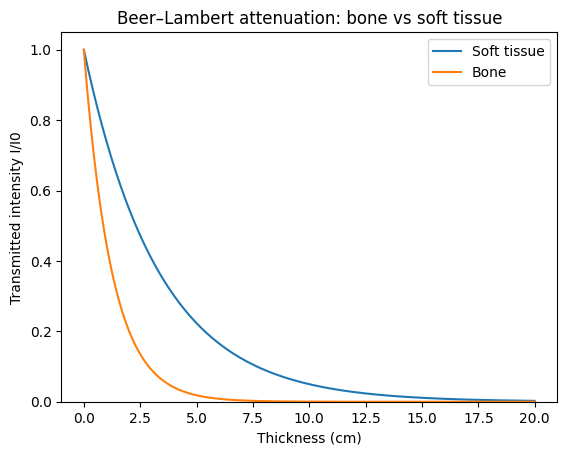

In [4]:
# Illustrative linear attenuation coefficients (1/m)
mu_soft = 30.0
mu_bone = 80.0

x_cm = np.linspace(0, 20, 200)
x_m = x_cm / 100.0

I_soft = np.exp(-mu_soft * x_m)
I_bone = np.exp(-mu_bone * x_m)

plt.plot(x_cm, I_soft, label="Soft tissue")
plt.plot(x_cm, I_bone, label="Bone")
plt.xlabel("Thickness (cm)")
plt.ylabel("Transmitted intensity I/I0")
plt.title("Beer–Lambert attenuation: bone vs soft tissue")
plt.ylim(0, 1.05)
plt.legend()
plt.show()

**Interpretation:** Bone attenuates more strongly, producing higher contrast on radiographs.

A common clinical intuition:
- Thin structures might be hard to see
- Thickness and composition strongly influence image brightness


---
## 🧱 Part 4 — Multiple Layers (A More Realistic Model)

Often X‑rays pass through multiple tissues.

For layers in series, attenuation adds in the exponent:

$$
I = I_0 \exp\left(-\sum_i \mu_i x_i\right)
$$

We’ll model: soft tissue + bone + soft tissue.


In [5]:
I0 = 1.0
mu_soft = 30.0   # 1/m
mu_bone = 80.0   # 1/m

soft1_cm = 3.0
bone_cm  = 1.0
soft2_cm = 3.0

x_total = (mu_soft*(soft1_cm/100) +
           mu_bone*(bone_cm/100) +
           mu_soft*(soft2_cm/100))

I = I0 * np.exp(-x_total)
I

np.float64(0.0742735782143339)

### Try this
Increase `bone_cm` slightly (e.g., 0.5 → 1.5 cm).  
How sensitive is intensity to bone thickness?


---
## 📉 Part 5 — Half‑Value Layer (HVL)

The **half-value layer** is the thickness required to reduce intensity by 50%:

$$
\frac{I}{I_0} = \frac{1}{2} = e^{-\mu x_{1/2}}
\Rightarrow x_{1/2} = \frac{\ln 2}{\mu}
$$

HVL is a compact way to compare attenuation across materials/energies.


In [6]:
mu = 50.0  # 1/m
x_half_m = np.log(2)/mu
x_half_cm = x_half_m * 100
x_half_cm

np.float64(1.3862943611198906)

---
## ⭐ Optional: Interactive Explorer — Tissue + Thickness

Use sliders to explore transmitted intensity.
If sliders do not work in your environment, you can skip this section.

We’ll provide a small menu of “tissues” with illustrative μ values.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

try:
    from ipywidgets import interact, FloatSlider, Dropdown
except Exception as e:
    print("ipywidgets not available. You can skip this section.")
    print("Error:", e)

tissues = {
    "Air (very low)": 0.5,
    "Lung (low)": 10.0,
    "Soft tissue": 30.0,
    "Blood / water-like": 35.0,
    "Bone": 80.0,
}

def attenuation_demo(tissue="Soft tissue", thickness_cm=5.0, I0=1.0):
    mu = tissues[tissue]  # 1/m (illustrative)
    x = thickness_cm/100
    I = I0*np.exp(-mu*x)

    # curve up to 20 cm for context
    x_cm = np.linspace(0, 20, 200)
    I_curve = np.exp(-mu*(x_cm/100))

    plt.figure(figsize=(6,3))
    plt.plot(x_cm, I_curve)
    plt.scatter([thickness_cm], [I], zorder=3)
    plt.ylim(0, 1.05)
    plt.xlabel("Thickness (cm)")
    plt.ylabel("Transmitted intensity I/I0")
    plt.title(f"{tissue}: μ={mu:.1f} 1/m, I/I0={I:.3f}")
    plt.show()

try:
    interact(
        attenuation_demo,
        tissue=Dropdown(options=list(tissues.keys()), value="Soft tissue", description="Tissue"),
        thickness_cm=FloatSlider(min=0, max=20, step=0.5, value=5.0, description="Thickness (cm)")
    )
except Exception as e:
    print("Interactive display not available here. That's okay—skip this section.")
    print("Error:", e)

interactive(children=(Dropdown(description='Tissue', index=2, options=('Air (very low)', 'Lung (low)', 'Soft t…

---
## 🧠 Part 6 — CT in One Sentence (Concept)

A CT scanner measures many **projections** of attenuation from many angles.
Reconstruction algorithms then estimate a 2D map of attenuation (a CT image).

Below is a **toy example**:
- Create a simple “phantom” (a soft-tissue circle with a bone-like core)
- Compute projections (a crude sinogram)
- Do a very simple backprojection reconstruction

This is **optional** and is included to build intuition, not to teach CT algorithms in full detail.


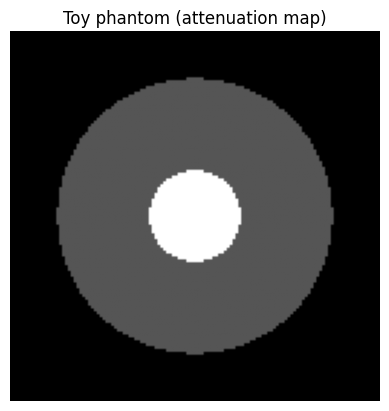

In [8]:
# Optional advanced CT toy model (pre-filled)
import numpy as np
import matplotlib.pyplot as plt

# Create a simple phantom (2D attenuation map)
N = 128
phantom = np.zeros((N, N))

yy, xx = np.mgrid[-1:1:complex(0,N), -1:1:complex(0,N)]
r = np.sqrt(xx**2 + yy**2)

# Soft tissue disk
phantom[r < 0.75] = 0.02   # arbitrary attenuation units
# Bone core
phantom[r < 0.25] = 0.06

plt.imshow(phantom, cmap='gray')
plt.title("Toy phantom (attenuation map)")
plt.axis('off')
plt.show()

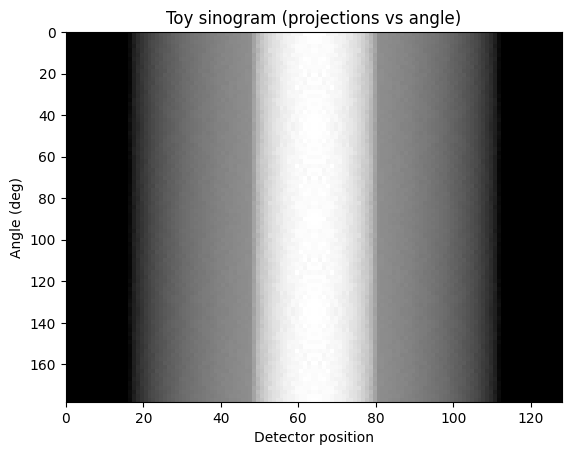

In [9]:
# Compute a crude sinogram by rotating the phantom and summing columns (projection)
angles = np.linspace(0, 180, 90, endpoint=False)

def rotate_image(img, angle_deg):
    # simple nearest-neighbor rotation using numpy indexing (good enough for intuition)
    from math import cos, sin, radians
    a = radians(angle_deg)
    c, s = cos(a), sin(a)
    N = img.shape[0]
    out = np.zeros_like(img)
    center = (N-1)/2
    for i in range(N):
        for j in range(N):
            y = i - center
            x = j - center
            xr =  c*x + s*y
            yr = -s*x + c*y
            ii = int(round(yr + center))
            jj = int(round(xr + center))
            if 0 <= ii < N and 0 <= jj < N:
                out[i,j] = img[ii,jj]
    return out

sinogram = []
for a in angles:
    rot = rotate_image(phantom, a)
    proj = rot.sum(axis=0)  # sum along rows -> line integrals
    sinogram.append(proj)

sinogram = np.array(sinogram)

plt.imshow(sinogram, aspect='auto', cmap='gray',
           extent=[0, N, angles.max(), angles.min()])
plt.xlabel("Detector position")
plt.ylabel("Angle (deg)")
plt.title("Toy sinogram (projections vs angle)")
plt.show()

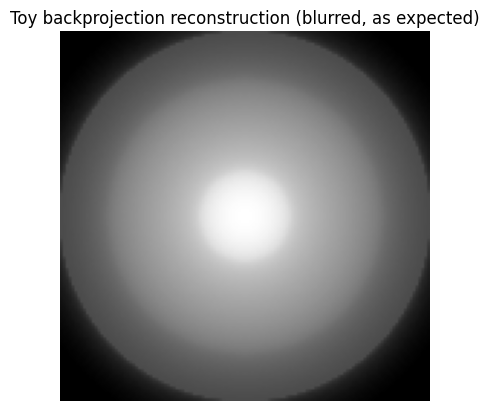

In [10]:
# Simple (unfiltered) backprojection reconstruction (intuition only)
recon = np.zeros_like(phantom)

for idx, a in enumerate(angles):
    # repeat projection as an image
    proj = sinogram[idx]
    proj_img = np.tile(proj, (N, 1))
    # rotate back and accumulate
    recon += rotate_image(proj_img, -a)

# Normalize for display
recon_disp = recon / recon.max()

plt.imshow(recon_disp, cmap='gray')
plt.title("Toy backprojection reconstruction (blurred, as expected)")
plt.axis('off')
plt.show()

**Interpretation:** Backprojection alone produces a blurred image.
Real CT uses **filtered backprojection** or iterative methods to sharpen reconstruction.


---
## 🧠 Big Picture Takeaways

- X‑ray photon energy (keV) corresponds to very short wavelengths  
- Tissue attenuation is often modeled with **Beer–Lambert**: $I = I_0 e^{-\mu x}$  
- Different tissues have different $\mu$ → **contrast** (bone vs soft tissue)  
- Thickness strongly affects detector intensity (and image brightness)  
- CT uses many projections from many angles to reconstruct a 2D attenuation map

Next: Chapter 11 depends on your sequence (often nuclear physics / MRI / radiation therapy).
